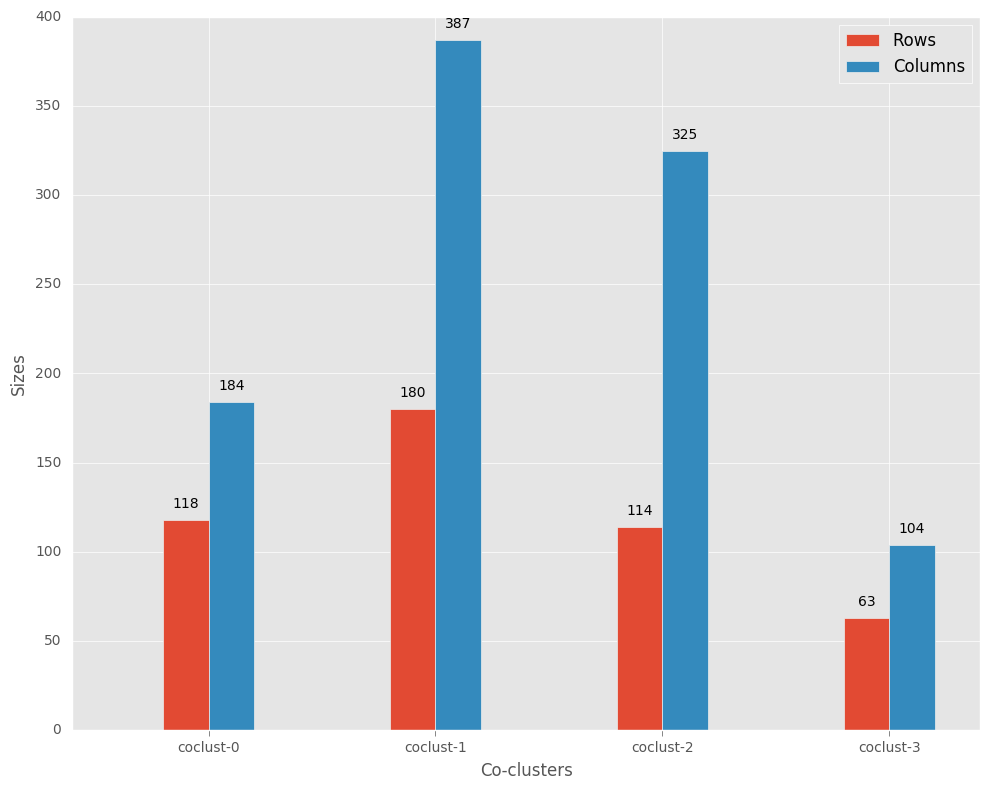

In [1]:
%matplotlib inline
import numpy as np
from scipy.sparse import coo_matrix
from coclust.coclustering import CoclustSpecMod
from coclust.visualization import plot_cluster_sizes

n_clust = 4
file_name = "../datasets/cstr.csv"

# Load the csv file and build the matrix. It may take a few seconds
a = np.loadtxt(file_name, delimiter=',', skiprows=1)
X = (coo_matrix((a[:, 2], (a[:, 0].astype(int), a[:, 1].astype(int))))).tocsr()

# Perform co-clustering
model = CoclustSpecMod(n_clusters=n_clust, random_state=0)
model.fit(X)

plot_cluster_sizes(model)